In [58]:
from itertools import product

import pandas as pd
import matplotlib.pyplot as plt

In [59]:
tourn_res_src = "../data/Tournament Results.xlsx"
tourny_df = pd.read_excel(tourn_res_src)

In [60]:
tourny_df.head()

,Player,Starting Size,Metabolism,Density,Seed,Goal Reached,Final Size,Goal Size,Turns Taken,Valid Moves,Timeout
0,Group 1,3,0.05,0.01,0,False,9,36,10000,0,False
1,Group 1,3,0.05,0.01,1,False,9,36,10000,0,False
2,Group 1,3,0.05,0.01,2,False,9,36,10000,0,False
3,Group 1,3,0.05,0.01,3,False,9,36,10000,0,False
4,Group 1,3,0.05,0.01,4,False,9,36,10000,0,False


In [61]:
def fix_Am(tourny_df: pd.DataFrame, A: int, metabolism: float) -> plt.Figure:
	success = (
		tourny_df
			.loc[(tourny_df["Starting Size"] == A) & (tourny_df["Goal Reached"] == True)]
			.filter(["Player", "Metabolism", "Density", "Turns Taken"])
	)
	success_agg = success.groupby(["Player", "Metabolism", "Density"]).mean()

	df_slice = success_agg.reset_index()
	df_slice = df_slice.loc[(df_slice["Metabolism"] == metabolism)]
	ax = df_slice.pivot(index='Density', columns='Player', values='Turns Taken').plot(
		linestyle=':', marker='o',
		title=f"Avg Turns Taken for Successful Runs\nm={metabolism:.2f}, A={A}",
		xlabel='bacteria density', ylabel='average turns taken'
	)

	return ax.get_figure()



/opt/homebrew/anaconda3/envs/ameoba/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


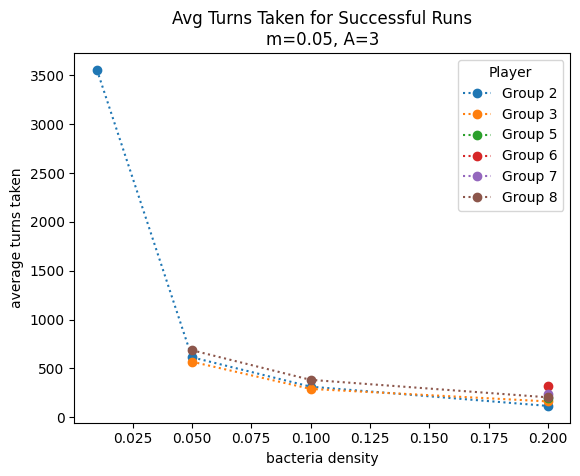

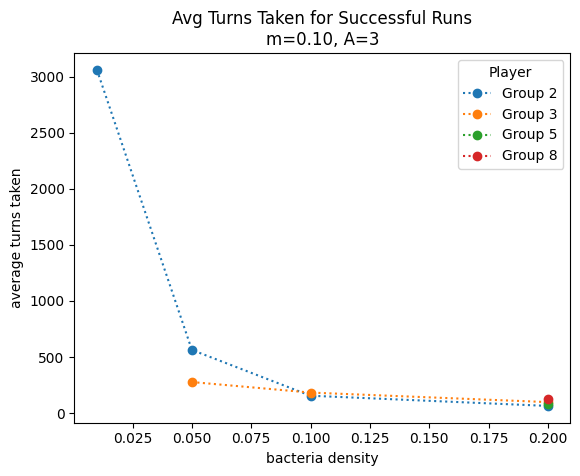

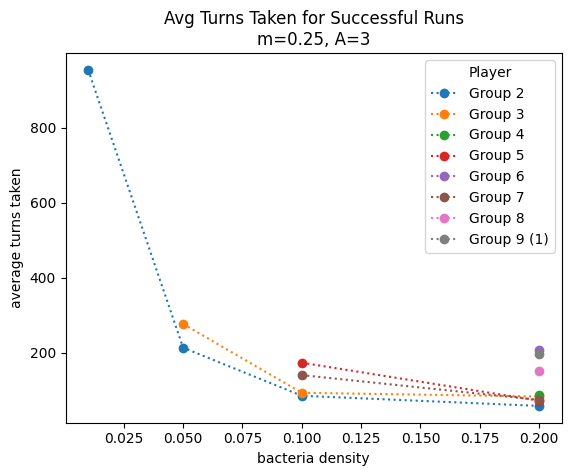

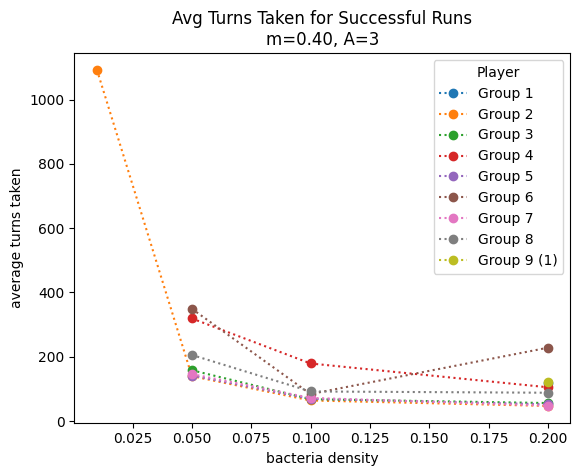

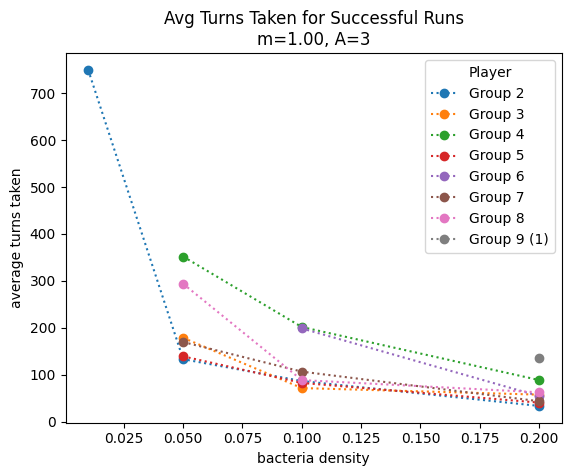

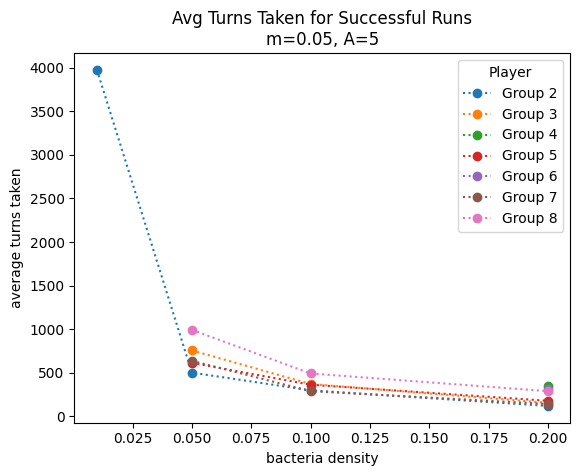

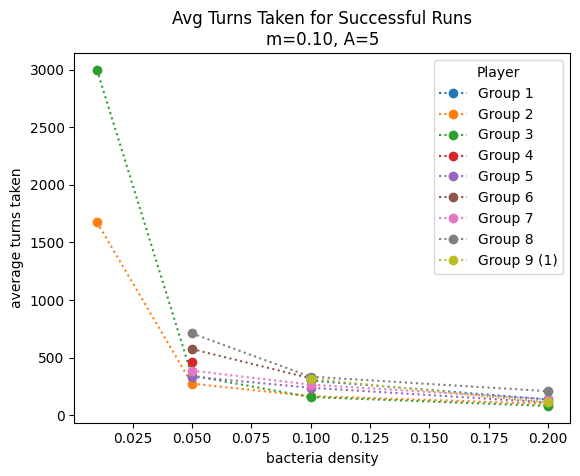

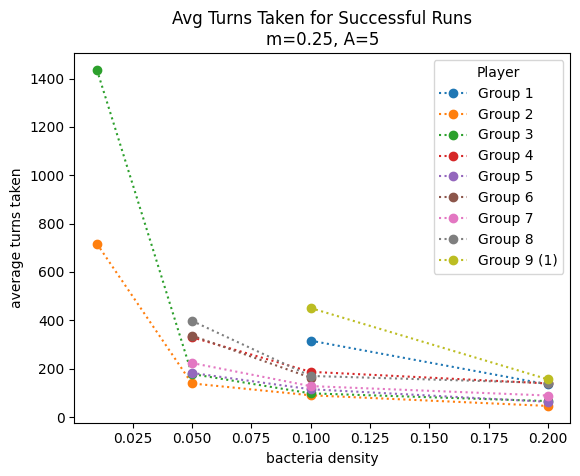

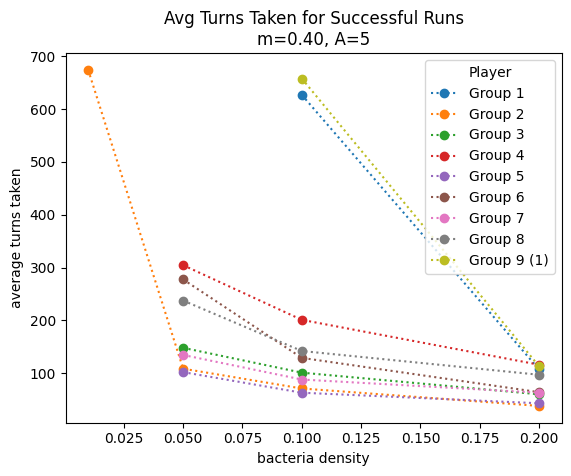

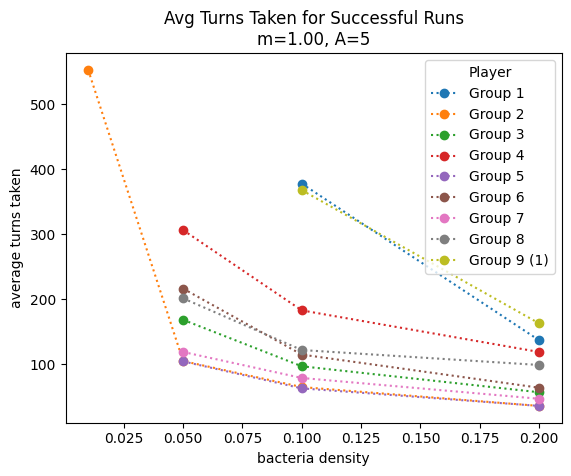

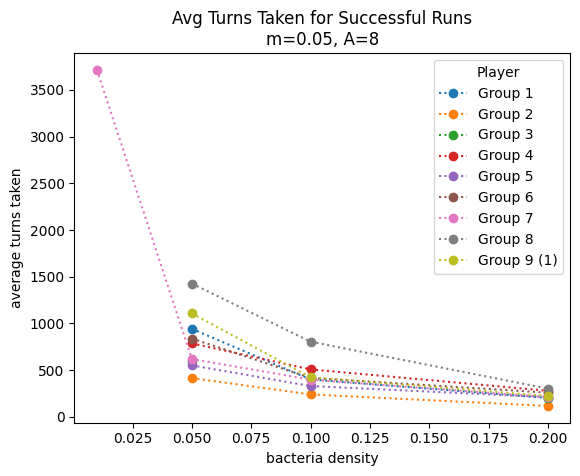

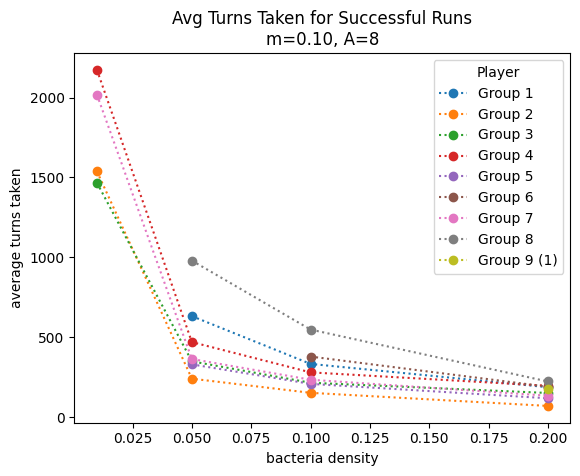

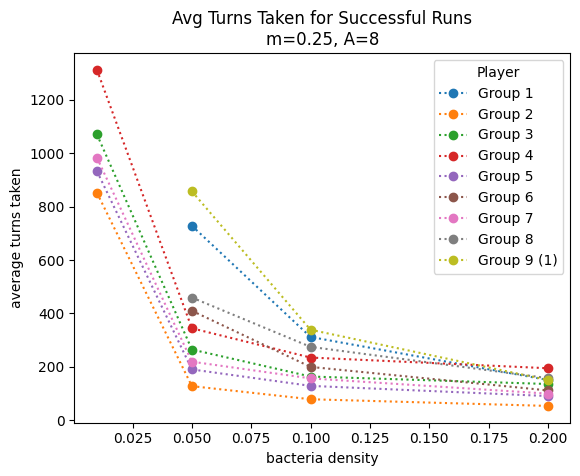

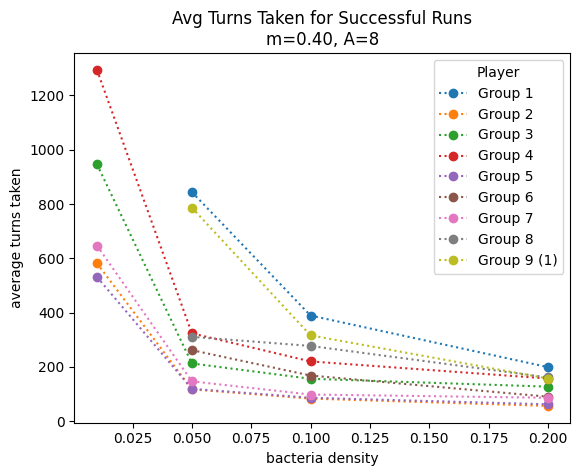

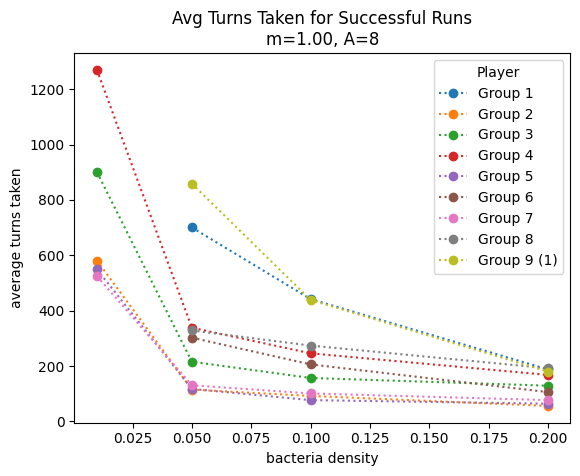

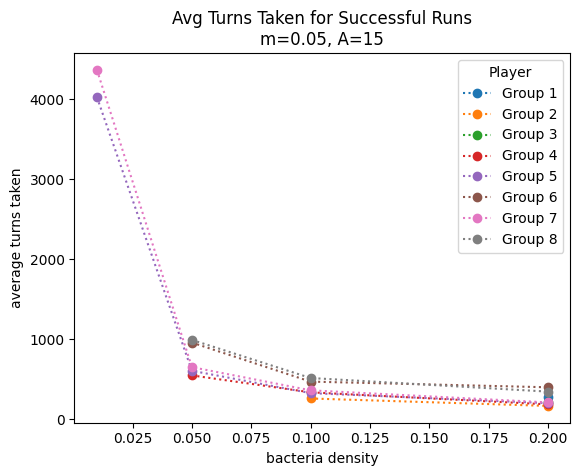

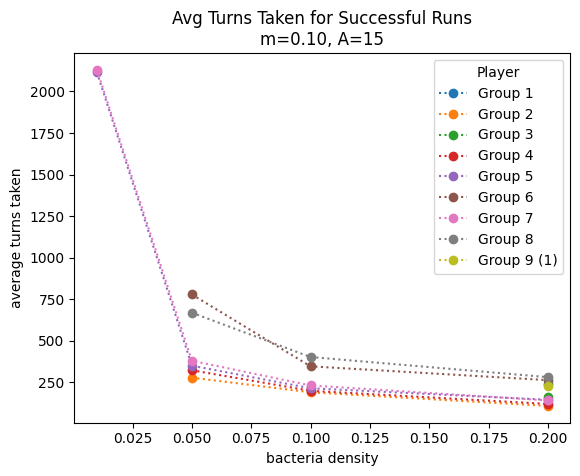

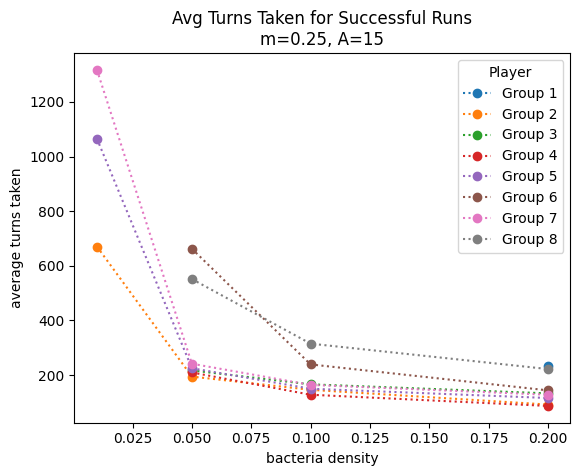

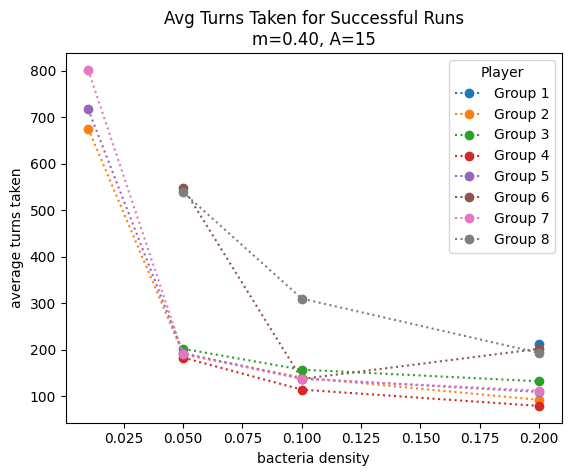

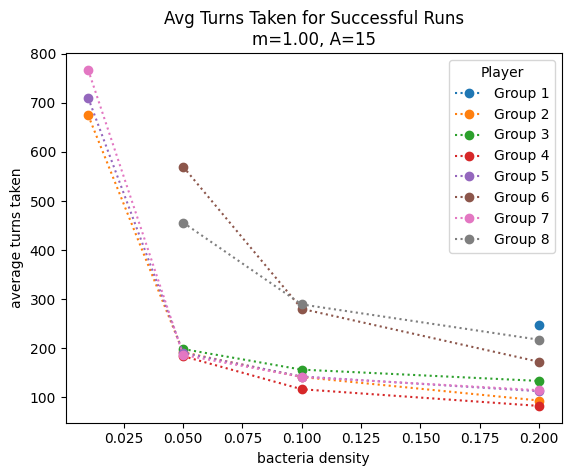

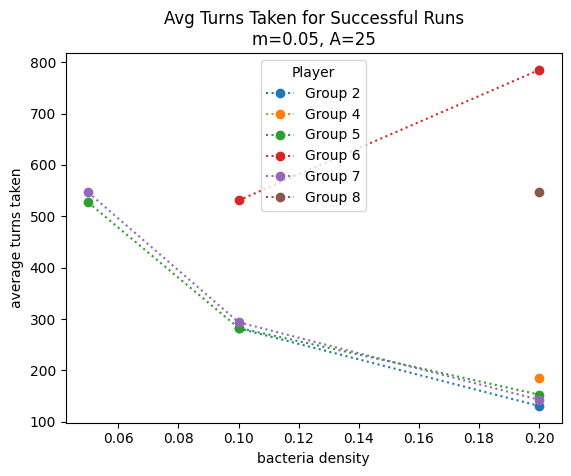

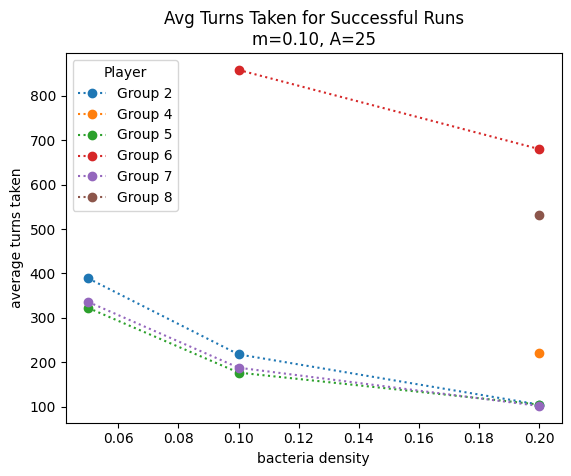

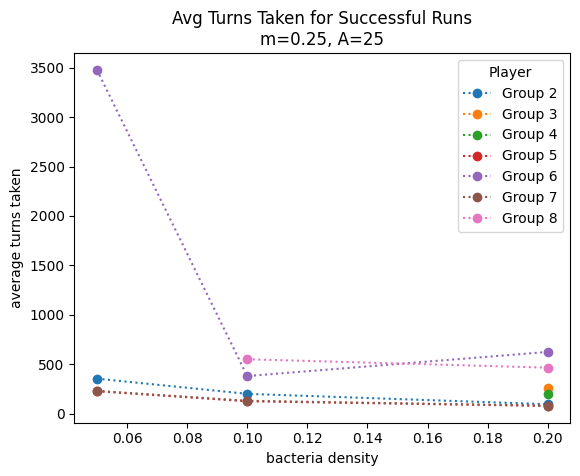

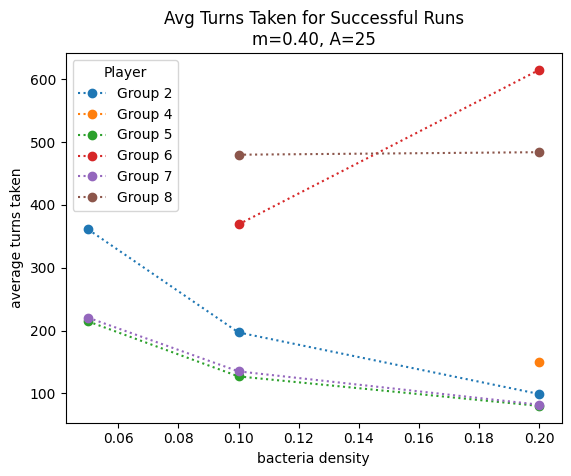

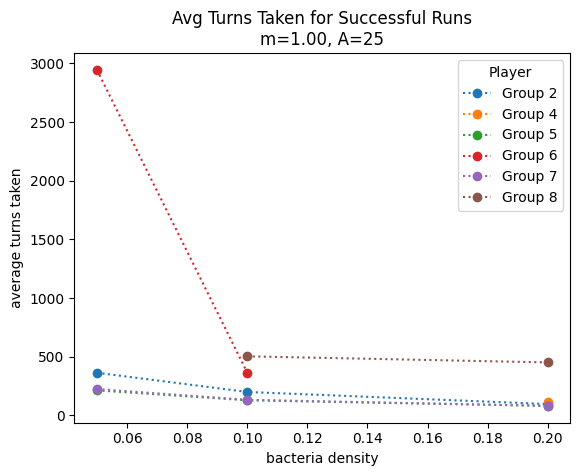

In [62]:
out_dir = '../graphs'
As = [3, 5, 8, 15, 25]
ms = [0.05, 0.1, 0.25, 0.4, 1.0]

for A, m in product(As, ms):
	fig = fix_Am(tourny_df, A, m)
	fig.savefig(f"{out_dir}/A{A}_m{int(m * 100)}", dpi=300)